In [1]:
import sqlite3
import numpy as np
from ctypes import *
import sys
import os
import baf2sql
import matplotlib.pyplot as plt

Specified BAF has 279 spectra with line and profile data.


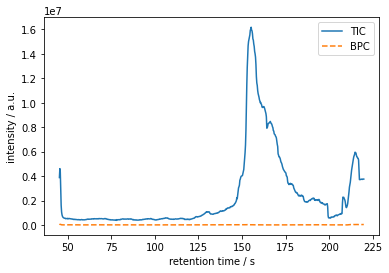

<Figure size 432x288 with 0 Axes>

In [2]:
analysis_dir = "D:\\220701 mass spec\\220107 A 4 hrs_340688_GA1_01_82117.d"


if sys.version_info.major == 2:
    # note: assuming a european Windows here...
    analysis_dir = unicode(analysis_dir, 'cp1252')
    
baf_fn = os.path.join(analysis_dir, "analysis.baf")
sqlite_fn = baf2sql.getSQLiteCacheFilename(baf_fn)
conn = sqlite3.connect(sqlite_fn)

# --- Count spectra
q = conn.execute("SELECT COUNT(*) FROM Spectra "
                 "WHERE LineMzId NOT NULL AND ProfileMzId NOT NULL")
row = q.fetchone()
N = row[0]
print("Specified BAF has {} spectra with line and profile data.".format(N))

# --- Plot TIC and BPC over MS^1 spectra
q = conn.execute("SELECT Rt, SumIntensity, MaxIntensity FROM Spectra s "
                 "JOIN AcquisitionKeys ak ON s.AcquisitionKey = ak.Id "
                 "WHERE ak.MsLevel = 0 "
                 "ORDER BY s.ROWID")
data = [ row for row in q ]
rt = [ row[0] for row in data ]
tic = [ row[1] for row in data ]
bpc = [ row[2] for row in data ]

plt.figure()
plt.plot(rt, tic)
# plt.hold(True)
plt.plot(rt, bpc, '--')
plt.xlabel('retention time / s')
plt.ylabel('intensity / a.u.')
plt.legend(['TIC', 'BPC'])
plt.show()


# --- Plot spectrum with largest base-peak intensity

np_bpc = np.array(bpc, dtype = 'float')
rt0 = rt[np.nanargmax(np_bpc)]


q = conn.execute("SELECT LineMzId, LineIntensityId, ProfileMzId, ProfileIntensityId FROM Spectra "
                 "WHERE ABS(Rt - {}) < 1e-8".format(rt0))
                 
row = q.fetchone()

bs = baf2sql.BinaryStorage(baf_fn)


if row != None:

    plt.figure()

    bs = baf2sql.BinaryStorage(baf_fn)
    
    if row[2] != None and row[3] != None:
        profile_mz = bs.readArrayDouble(row[2])
        profile_int = bs.readArrayDouble(row[3])
        plt.plot(profile_mz, profile_int)

    if row[0] != None and row[1] != None:
        line_mz = bs.readArrayDouble(row[0])
        line_int = bs.readArrayDouble(row[1])

        # stem() can take quite some time, so we reduce data for this example:
        max_points = 100;
        if len(line_mz) > max_points:
            line_mz = line_mz[0:max_points]
            line_int = line_int[0:max_points]
        # plt.hold(True)
#         plt.stem(line_mz, line_int)

#     plt.xlabel("m/z / Th")
#     plt.ylabel('intensity / a.u.')
#     plt.title("Spectrum at RT = {}s".format(rt0))
#     plt.show()
    
else:
    print("No spectrum found...")



In [3]:
np_data = np.array(data, dtype=np.float)
np_rt = np.array(rt, dtype=np.float)
np_tic = np.array(tic, dtype=np.float)
np_bpc = np.array(bpc, dtype=np.float)

In [4]:
np_data.dtype

dtype('float64')

In [6]:
data2.dtype

dtype('float64')

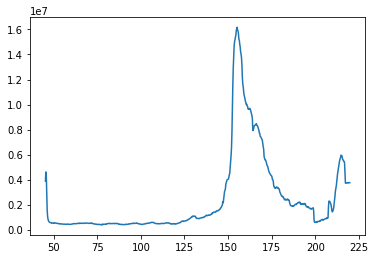

In [7]:
plt.plot(data2[:, 0], data2[:, 1])

In [40]:
from unidec_modules.v3_SeqChrom import * 
from unidec_modules import unidectools as ud
eng = SeqChrom()
data2 = np.array(np_data[:, :2], dtype = np.float)
data2=data2[~np.isnan(data2).any(axis=1)]
data2[:, 0] = data2[:, 0]/60
eng.tic = eng.ticdat = data2


UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe


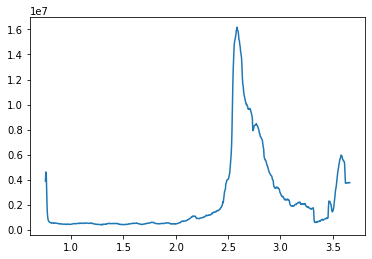

In [43]:
plt.plot(data2[:, 0], data2[:, 1])

In [46]:
lb = 0.5
ub = 3.0
eng.config.chrom_peak_width = 0.6
eng.get_chrom_peaks(lb = lb, ub=ub)

701 2
Noise Level: 0.026119257607253046 Window: 0.6
Bad Peak [0.75501667 0.23080761] 0.01660000000000006 [0.7550166666666667, 0.7716166666666667]
2.5862833333333333 0.2532833333333331
3.5830333333333333 0.13703333333333312


(array([[2.58628333, 1.        ],
        [3.58303333, 0.3490586 ]]),
 array([[2.5323    , 2.78558333]]))

In [57]:
self = eng
times = self.chrompeaks_tranges
for i, t in enumerate(times):
    min, max = t[0], t[1]
    minscan = ud.nearest(self.ticdat[:, 0], min)
    
    if self.ticdat[minscan, 0] < min:
        minscan += 1
    maxscan = ud.nearest(self.ticdat[:, 0], max)
    if self.ticdat[maxscan, 0] > max:
        maxscan -= 1
    if maxscan <= minscan:
        maxscan = minscan + 1
    self.scans = [minscan, maxscan, min, max]
    attrs = {"timestart": min, "timeend": max,
                 "timemid": (min + max) / 2.,
                 "scanstart": minscan, "scanend": maxscan,
                 "scanmid": (minscan + maxscan) / 2.}
    self.attrs = attrs

{'timestart': 2.5323,
 'timeend': 2.7855833333333333,
 'timemid': 2.6589416666666668,
 'scanstart': 428,
 'scanend': 489,
 'scanmid': 458.5}